In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Train | Test Split and Scalling : 

In [5]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### GridSearchCV : 

In [6]:
from sklearn.model_selection import GridSearchCV, cross_validate

### Modelling : 

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

param_grid = {"splitter": ["best", "random"],
             "class_weight" : [None, "balanced"],
             "max_depth": [None, 2, 3, 4, 5,6, 7]}

grid_model = GridSearchCV(estimator=dt_model,
                          param_grid=param_grid,
                          scoring='recall',
                          cv=10,
                          n_jobs = -1)

grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             scoring='recall')

In [8]:
grid_model.best_params_

{'class_weight': 'balanced', 'max_depth': 3, 'splitter': 'best'}

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

param_grid = {"n_estimators" : [None, 64, 128],
              "criterion" : ["gini", "estimator"],
              "max_features" : ["auto", "log2"],
              "max_depth": [None, 2, 3, 4, 5,6, 7],
              "class_weight" : [None, "balanced"]
             }

grid_model2 = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='recall',
                          cv=10,
                          n_jobs = -1)

grid_model2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'estimator'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [None, 64, 128]},
             scoring='recall')

In [10]:
grid_model2.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'n_estimators': 64}

### Metrics : 

In [11]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [12]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[72 52]
 [ 9 59]]
              precision    recall  f1-score   support

           0       0.89      0.58      0.70       124
           1       0.53      0.87      0.66        68

    accuracy                           0.68       192
   macro avg       0.71      0.72      0.68       192
weighted avg       0.76      0.68      0.69       192


Train_Set
[[235 141]
 [ 19 181]]
              precision    recall  f1-score   support

           0       0.93      0.62      0.75       376
           1       0.56      0.91      0.69       200

    accuracy                           0.72       576
   macro avg       0.74      0.77      0.72       576
weighted avg       0.80      0.72      0.73       576



In [13]:
eval_metric(grid_model2, X_train, y_train, X_test, y_test)

Test_Set
[[87 37]
 [15 53]]
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       124
           1       0.59      0.78      0.67        68

    accuracy                           0.73       192
   macro avg       0.72      0.74      0.72       192
weighted avg       0.76      0.73      0.73       192


Train_Set
[[296  80]
 [ 40 160]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       376
           1       0.67      0.80      0.73       200

    accuracy                           0.79       576
   macro avg       0.77      0.79      0.78       576
weighted avg       0.81      0.79      0.80       576



### Precision_Recall_Curve : 

In [14]:
from sklearn.metrics import plot_precision_recall_curve

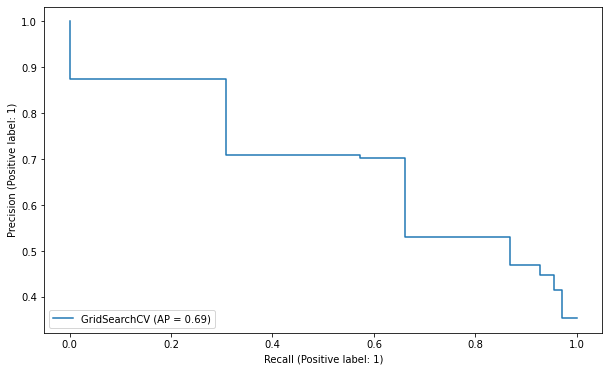

In [15]:
plot_precision_recall_curve(grid_model, X_test, y_test);

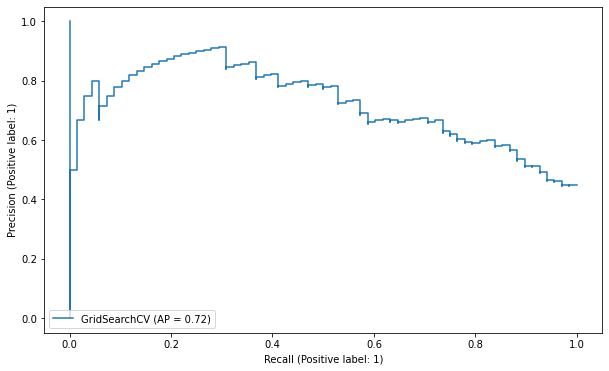

In [16]:
plot_precision_recall_curve(grid_model2, X_test, y_test);